In [249]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle


In [250]:
Pi = np.pi
n = 32
L = 4 * np.pi
eps = 0.2
phiBar = 0.2
phiAmp = phiBar*2
dx = L / n
dt = 0.05
tf = 2000
tplot = 400

0.2


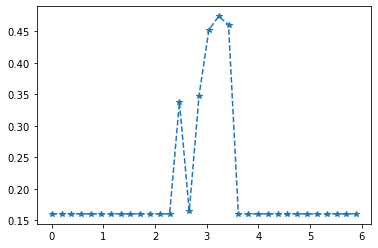

In [251]:
# x and y
x = np.linspace(0, 2 * Pi - dx, n)

# Make sure that the average is phi_bar
phi = np.random.random(n)
width = int(np.floor(n * 0.1))
left = int(n / 2 - width)
right = int(n / 2 + width)
phi[0:left] = 0
phi[right:] = 0
phiAve = np.sum(phi) / n
phi = (phi - phiAve) * phiAmp + phiBar




print(np.sum(phi) / n)

plt.figure()
plt.plot(x, phi, "*--")


In [252]:
def live_plot(x, y, figsize=(13, 5), title="", ylim=[-1,1]):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.plot(x, np.real(y), "*-")
    plt.title(title)
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()
    plt.pause(0.05)


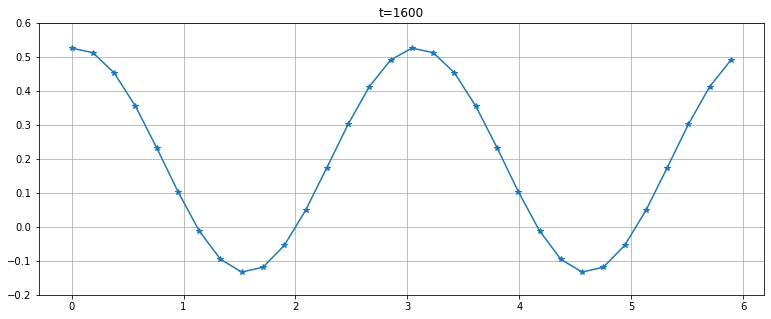

In [253]:
%matplotlib inline

phiOld = phi
ylim = [-0.2, 0.6]
k = 2 * Pi / L * np.concatenate((np.arange(0, n / 2), np.arange(-n / 2, 0)))  # or np.fft.fftfreq(100, d=dx/L)
k2 = np.power(k, 2)
k4 = np.power(k, 4)
k6 =    np.power(k, 6)

data = phiOld.reshape(1,-1)
tArray = np.array([0])
for t in range(0,tf):
    phiOldHat = np.fft.fft(phiOld)
    phiCubeOldHat = np.fft.fft(np.power(phiOld,3))
    numerator = -dt * k2 * phiCubeOldHat + phiOldHat 
    denominator = 1 + dt * (1 - eps) * k2 - 2 * dt * k4 + dt * k6
    phiNewHat = np.divide(numerator , denominator)
    phiNew = np.fft.ifft(phiNewHat)
    phiOld = np.real(phiNew)
    data = np.append(data, phiOld.reshape(1,-1), axis=0)
    tArray = np.append(tArray, t*dt)
    if np.mod(t, tplot) == 0:
        live_plot(x, phiOld, title=f't={t}', ylim=ylim)

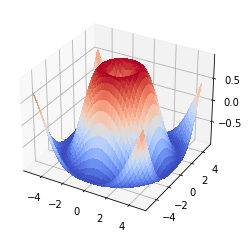

In [258]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [260]:
data.shape

(2001, 32)